# BAYES CLASSIFIER FOR SENTIMENT ANALYSIS

## Data Preprocessing

In [84]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.pipeline import Pipeline
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.tag import pos_tag
import collections
import re
from nltk.corpus import words

In [85]:
df=pd.read_csv('data/Sentiment140.csv', encoding='latin-1', header=None, index_col=False)
df = df[[0, 5]].rename(columns={0: "target", 5: "text"})
df.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [86]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [87]:
# output the dataframe structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   text    1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


<AxesSubplot:>

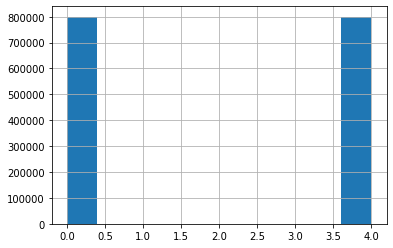

In [88]:
#Convert target to categorical
df['target'] = pd.Categorical(df.target)
df['target'].unique()
df['target'].hist()

In this dataset, target values describe the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive). However, there are only negative and positive tags (0 and 4) so let's change those values to 0 = negative, 1 = positive

<AxesSubplot:>

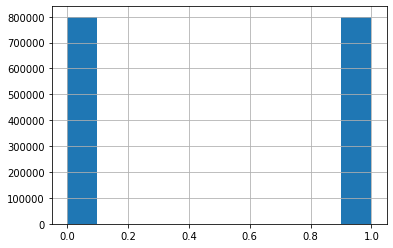

In [89]:
df['target'] = df['target'].replace(4,1) #Replace 4 (positive) by 1. Negative (0) remain the same
df['target'].hist()

<AxesSubplot:>

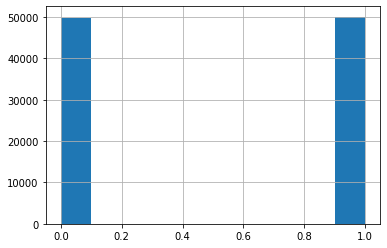

In [90]:
#For testing purposes, get a sample of the data
df=df.sample(100000)
df['target'].hist()

## Preprocess text

In [91]:
def data_cleaning(texts): 
    remove_stop_words = False
    lemmatizer=WordNetLemmatizer()
    tokenizer=TweetTokenizer()
    clean_text=[]
    for text in texts: 
        text = text.lower() #lowe case
        text = re.sub("\s\s+", " ", text) #remove extra spaces
        text = text.encode('ascii',errors='ignore').decode() #Remove non-ASCII characters
        text = re.sub(r'[0-9]', '', text) #Remove numbers
        lemmatized_tokens=[]
        tokens=tokenizer.tokenize(text.lower())
        for token in tokens:    
            lemmatized_token=lemmatizer.lemmatize(token)
            if remove_stop_words:
                if lemmatized_token not in stopwords.words('english'): lemmatized_tokens.append(lemmatized_token) 
            else: 
                lemmatized_tokens.append(lemmatized_token)
        clean_text.append(' '.join(lemmatized_tokens))
    return clean_text

In [92]:
estimators=[('cleaner', FunctionTransformer(data_cleaning)),
            ('vectorizer', TfidfVectorizer(max_features=100000, ngram_range=(1, 2)))]
preprocessing_pipeline=Pipeline(estimators)

In [93]:
# Split in training set and, testing set and separate labels from data
X=df['text']
y=df['target']
X_train, X_test, y_train, y_test=train_test_split(X, y)

In [94]:
#Transform the training set
X_train_transformed=preprocessing_pipeline.fit_transform(X_train)
#At 22min fails

In [95]:
# Create a Naive Bayes model and fit the training data
naive_bayes_model=MultinomialNB()
naive_bayes_model.fit(X_train_transformed, y_train)

#Apply to test data
X_test_transformed=preprocessing_pipeline.transform(X_test)

In [96]:
# Evaluate model
print(f'Test Score: {nb.score(X_test_transformed, y_test)}')
print(f'Train Score: {nb.score(X_train_transformed, y_train)}')

Test Score: 0.7824
Train Score: 0.8796266666666667
